<a href="https://colab.research.google.com/github/MrDadzie/Sepsis_Classification_Project/blob/master/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General




#Setup


#Installation


In [ ]:
!pip install pandas_profiling
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 29.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=cd8ebc0de67ee0c139cb0945d058b5d2cdf557a4644df74b07f10084b579b8db
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

#Importation

In [ ]:
# Data handling
import pandas as pd
import numpy as np
# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
import os

# EDA (pandas-profiling, etc. )
from pandas_profiling import ProfileReport
from IPython.display import display

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from scipy.stats import skew

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metrics
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score
import shap
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import SGDClassifier

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Other packages
import pickle
from joblib import dump
import warnings
warnings.filterwarnings('ignore')

<ipython-input-5-c92e936a44c3>:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


#Data Loading

In [ ]:
train_data_url = 'https://raw.githubusercontent.com/MrDadzie/Sepsis_Classification_Project/master/Datasets/Patients_Files_Train.csv'
test_data_url = 'https://raw.githubusercontent.com/MrDadzie/Sepsis_Classification_Project/master/Datasets/Patients_Files_Train.csv'

In [ ]:
train_df = pd.read_csv(train_data_url,index_col = 0)
test_df = pd.read_csv(test_data_url, index_col = 0)

In [ ]:
print(train_df.head())
print(test_df.head())

           PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
ID                                                                     
ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
           PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
ID                                                                     
ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
ICU200014    0  137  40  35  168  43.1  2.288   33          1  P

#Exploratory Data Analysis : EDA

##Renaming Columns
Here, the columns are renamed to help in understanding the fields in the dataset.


In [ ]:
new_column_names = {'PRG':'Plasma Glucose',
               'PL': 'Blood Work Result-1',
               'PR': 'Blood Pressure',
               'SK': 'Blood Work Result-2',
               'TS': 'Blood Work Result-3',
               'M11': 'Body mass index',
               'BD2': 'Blood Work Result-4'


}

train_df.rename(columns = new_column_names, inplace = True)
test_df.rename (columns = new_column_names, inplace = True)

##Data Overview

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, ICU200010 to ICU200608
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Plasma Glucose       599 non-null    int64  
 1   Blood Work Result-1  599 non-null    int64  
 2   Blood Pressure       599 non-null    int64  
 3   Blood Work Result-2  599 non-null    int64  
 4   Blood Work Result-3  599 non-null    int64  
 5   Body mass index      599 non-null    float64
 6   Blood Work Result-4  599 non-null    float64
 7   Age                  599 non-null    int64  
 8   Insurance            599 non-null    int64  
 9   Sepssis              599 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 51.5+ KB


In [ ]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Plasma Glucose,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
Blood Work Result-1,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
Blood Pressure,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
Blood Work Result-2,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
Blood Work Result-3,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
Body mass index,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
Blood Work Result-4,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


##Hypothesis

**Null Hypothesis**: There is no significant difference in the likelihood of young and old patients developing sepssis.

**Alternate Hypothesis** : The likelihood of young patients developing sepssis differs significantly from that of old patients.

####Testing

In [ ]:
#Older patients > 40
Older_pos = train_df[(train_df['Age']> 40) & (train_df['Sepssis']=='Positive')]
Older_neg = train_df[(train_df['Age']> 40) & (train_df['Sepssis']=='Negative')]
Old = [len(Older_pos), len(Older_neg)]

#Younger patients < 40
Young_pos = train_df[(train_df['Age']< 40) & (train_df['Sepssis']=='Positive')]
Young_neg = train_df[(train_df['Age']< 40) & (train_df['Sepssis']=='Negative')]
Young = [len(Young_pos), len(Young_neg)]


In [ ]:
#Creating  contingency table
observed = np.array([Young, Old])

#Using the Chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)

#Results
alpha = 0.05

print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Contingency table of expected frequencies:")
print(expected)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the likelihood of young and old patients developing sepsis.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the likelihood of young and old patients developing sepsis.")



Chi-square statistic: 22.70032513740257
P-value: 1.893358300456099e-06
Degrees of freedom: 1
Contingency table of expected frequencies:
[[154.41285956 288.58714044]
 [ 51.58714044  96.41285956]]
Reject the null hypothesis: There is a significant difference in the likelihood of young and old patients developing sepsis.


#Univariate Analysis

In [ ]:
train_df.columns


Index(['Plasma Glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age', 'Insurance', 'Sepssis'],
      dtype='object')

##

In [ ]:
col_names  = train_df.iloc[:,:-2].select_dtypes(include= np.number).columns
col_names

Index(['Plasma Glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age'],
      dtype='object')

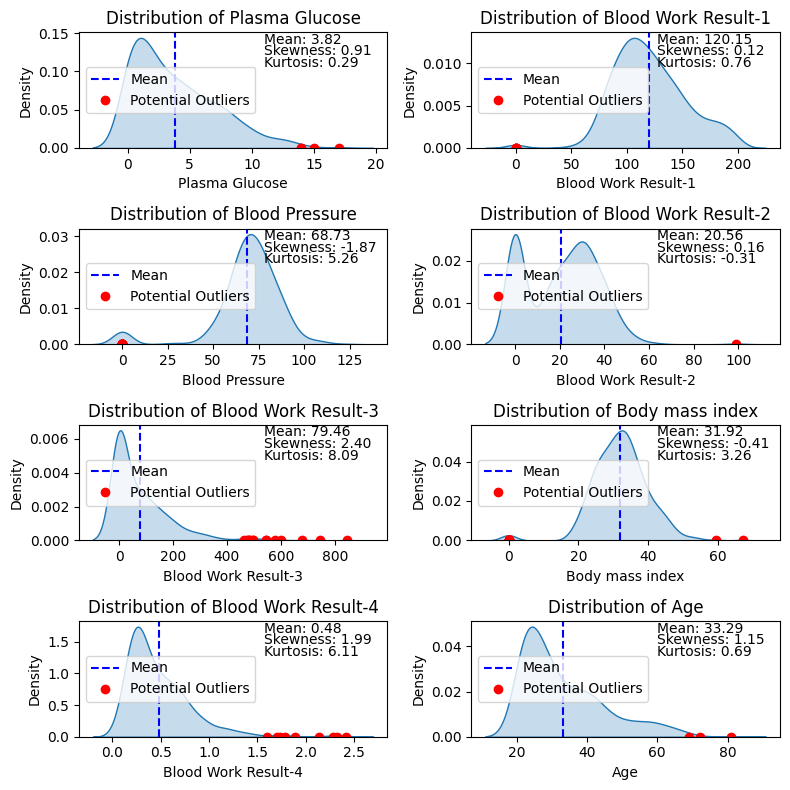

In [ ]:
#Visualizing the distribution of the numerical columns using the KDE plot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 8))  # 2x4 grid

for i, col in enumerate(col_names):
    row_index = i // 2  # Calculate row index
    col_index = i % 2  # Calculate column index

    sns.kdeplot(data=train_df, x=col, ax=axes[row_index, col_index], fill=True)
    axes[row_index, col_index].set_title(f'Distribution of {col}')
    axes[row_index, col_index].set_xlabel(col)
    axes[row_index, col_index].set_ylabel('Density')

    mean_val = train_df[col].mean()
    skewness_val = train_df[col].skew()
    kurtosis_val = train_df[col].kurtosis()

    axes[row_index, col_index].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[row_index, col_index].transAxes)
    axes[row_index, col_index].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[row_index, col_index].transAxes)
    axes[row_index, col_index].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[row_index, col_index].transAxes)

    axes[row_index, col_index].axvline(mean_val, color='blue', linestyle='--', label='Mean')

    outliers = train_df[(train_df[col] > mean_val + 3 * train_df[col].std()) | (train_df[col] < mean_val - 3 * train_df[col].std())]
    axes[row_index, col_index].plot(outliers[col], [0] * len(outliers), 'ro', label='Potential Outliers')

    axes[row_index, col_index].legend(loc = "center left")

plt.tight_layout()
plt.show()



Insights:


*   List
*   List item



## Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

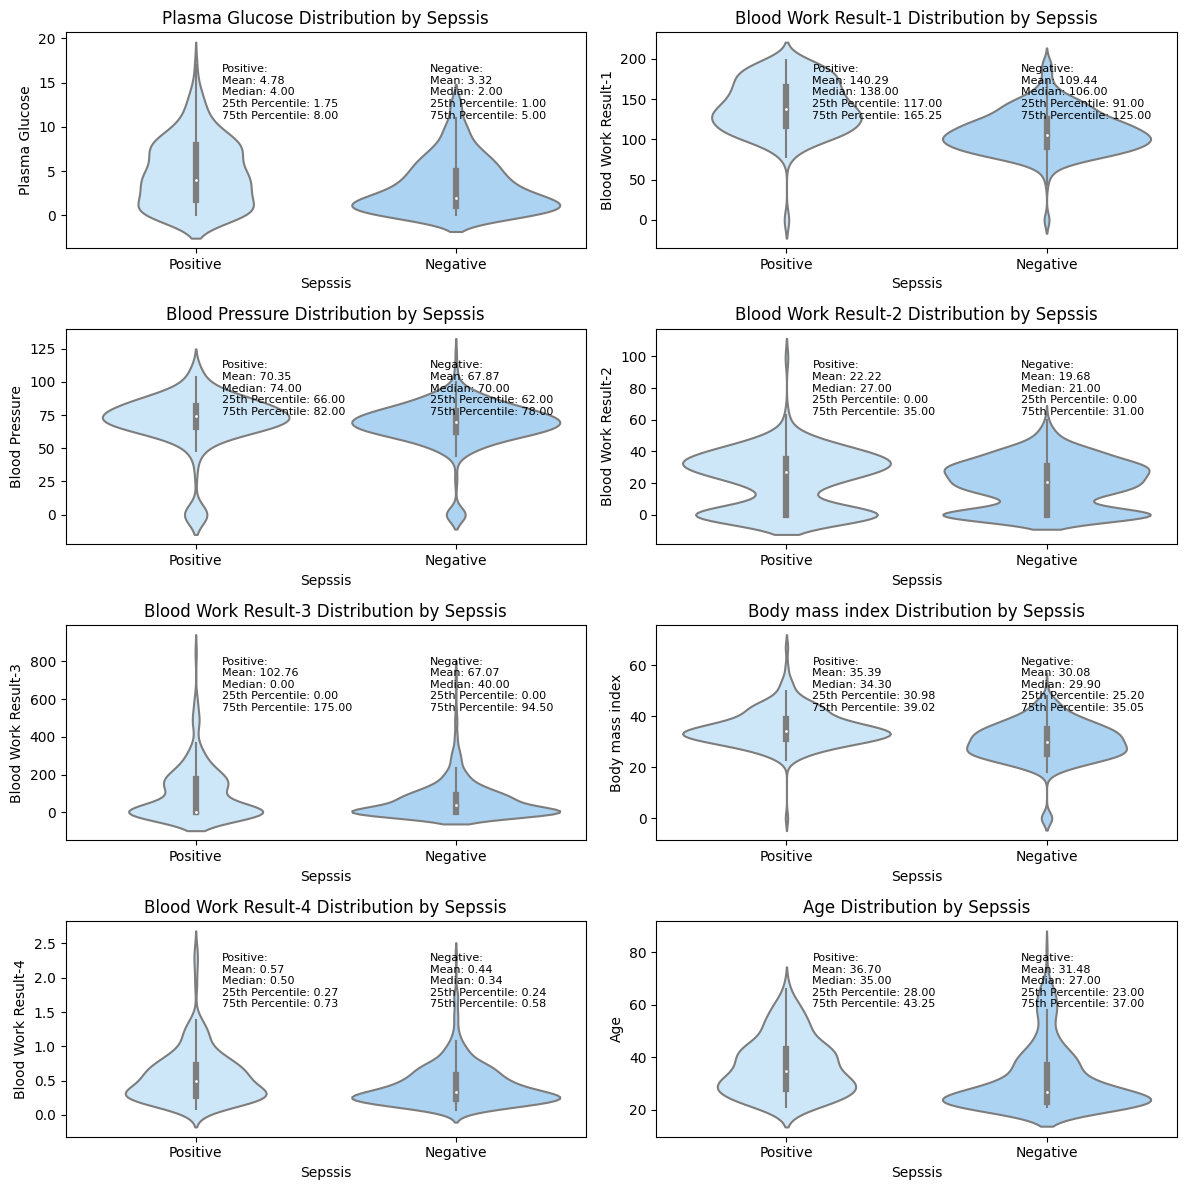

In [ ]:
# Visualizing the distribution of the variables with respect to the target variable
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))  # 2x4 grid

# Defining the custom color palettes
color_palette = ['#c7e9ff', '#a1d4ff', '#7ac0ff', '#55abff', '#3296ff']

for i, col in enumerate(col_names):
    row_index = i // 2  # Calculate row index
    col_index = i % 2  # Calculate column index

    sns.violinplot(data=train_df, x='Sepssis', y=col, ax=axes[row_index, col_index], palette=color_palette)
    axes[row_index, col_index].set_xlabel('Sepssis')  # Setting xlabel for the specific subplot
    axes[row_index, col_index].set_ylabel(col)
    axes[row_index, col_index].set_title(f'{col} Distribution by Sepssis')

    # Calculate statistics
    positive_vals = train_df[train_df['Sepssis'] == 'Positive'][col]
    negative_vals = train_df[train_df['Sepssis'] == 'Negative'][col]
    stat_dict = {
        'Positive': {
            'Mean': np.mean(positive_vals),
            'Median': np.median(positive_vals),
            '25th Percentile': np.percentile(positive_vals, 25),
            '75th Percentile': np.percentile(positive_vals, 75)
        },
        'Negative': {
            'Mean': np.mean(negative_vals),
            'Median': np.median(negative_vals),
            '25th Percentile': np.percentile(negative_vals, 25),
            '75th Percentile': np.percentile(negative_vals, 75)
        }
    }

    # Add statistics as text annotations
    axes[row_index, col_index].text(0.3, 0.6, f"Positive:\nMean: {stat_dict['Positive']['Mean']:.2f}\nMedian: {stat_dict['Positive']['Median']:.2f}\n25th Percentile: {stat_dict['Positive']['25th Percentile']:.2f}\n75th Percentile: {stat_dict['Positive']['75th Percentile']:.2f}", transform=axes[row_index, col_index].transAxes, color='black',fontsize = 8)
    axes[row_index, col_index].text(0.5, 0.6, f"Negative:\nMean: {stat_dict['Negative']['Mean']:.2f}\nMedian: {stat_dict['Negative']['Median']:.2f}\n25th Percentile: {stat_dict['Negative']['25th Percentile']:.2f}\n75th Percentile: {stat_dict['Negative']['75th Percentile']:.2f}", transform=axes[row_index, col_index].transAxes, color='black', fontsize = 8)

# Adjust layout and display plot
plt.tight_layout()
plt.show()


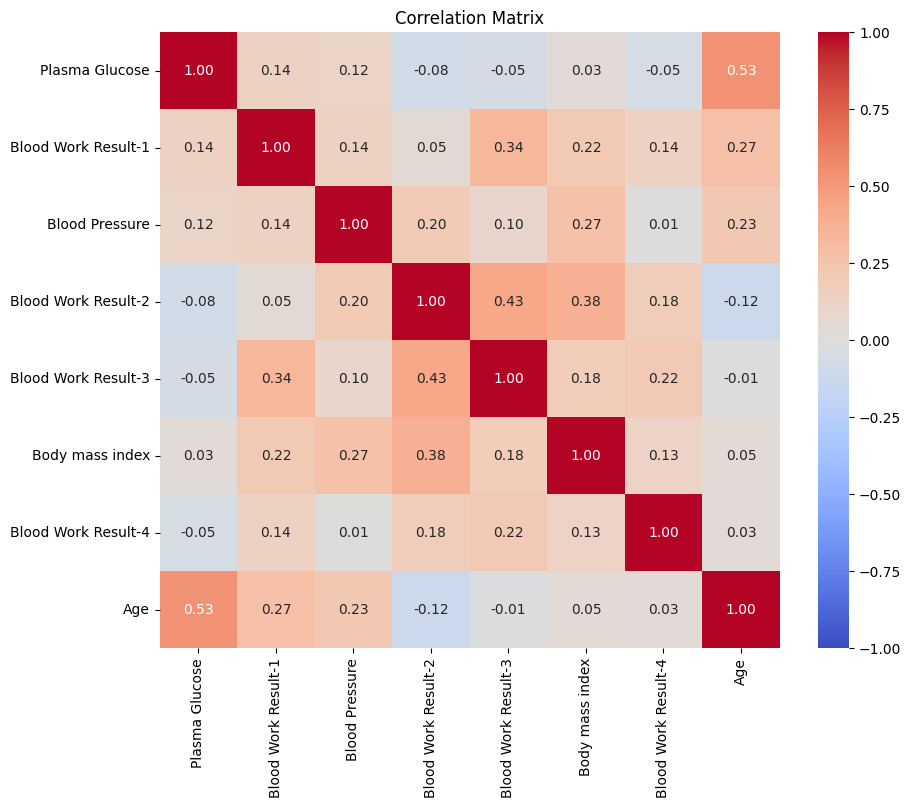

In [ ]:
# Visualizing the correlation between the  numerical features
corr_matrix = train_df.iloc[:,:-2].corr()

#Generating heatmap for the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()